# Introduction to Scikit-Learn

In [3]:
import seaborn as sns
data = sns.load_dataset('iris')
data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

/home/ujjawal/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


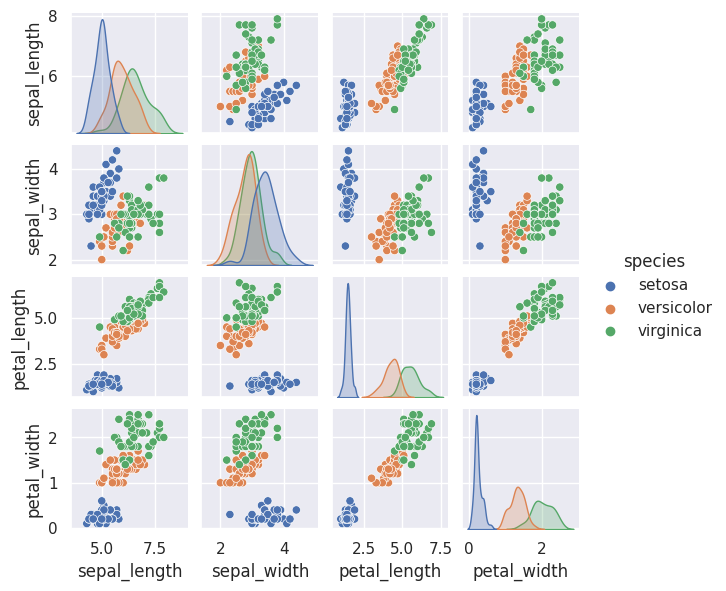

In [6]:
%matplotlib inline
sns.set()
sns.pairplot(data, hue='species', size=1.5)

For use in Scikit-learn, we will extract the features matrix and target array from the DataFrame.

In [7]:
X_data = data.drop('species', axis=1)
X_data.shape

(150, 4)

In [8]:
y_data = data['species']
y_data.shape

(150,)

## Supervised learning: Simple linear regression

In [9]:
import matplotlib.pyplot as plt
import numpy as np

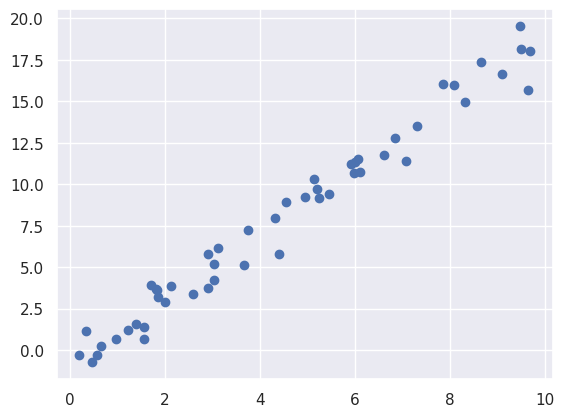

In [12]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [15]:
# arrange data into a features matrix and target vector

X = x[:, np.newaxis]
X.shape

(50, 1)

In [16]:
# fit the model
model.fit(X, y)

LinearRegression()

In [17]:
model.coef_

array([1.9776566])

In [18]:
model.intercept_

-0.9033107255311146

In [19]:
# predict labels for unknown data
xfit = np.linspace(-1, 11)

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

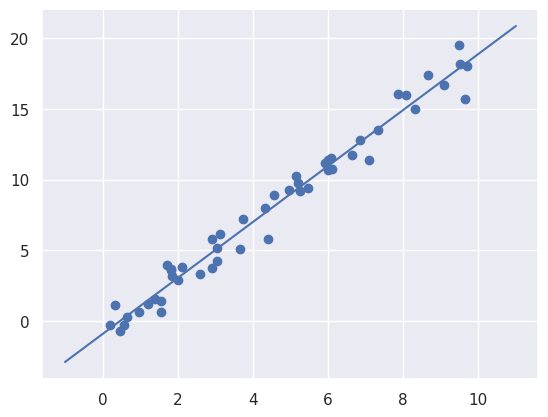

In [20]:
# visualize the results by plotting first the raw data and then the model fit

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Iris Classification

Given a model trained on a portion of the iris data, how well can we precdict the remaining labels?

In [23]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    random_state=1)

In [26]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [27]:
# accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_model)

0.9736842105263158

In [28]:
# reducing dimensionality

from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_data)
X_2d = model.transform(X_data)

## Iris Clustering

In [40]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3,
            covariance_type='full')
model.fit(X_data)
y_gmm = model.predict(X_data)

## MNIST

In [44]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

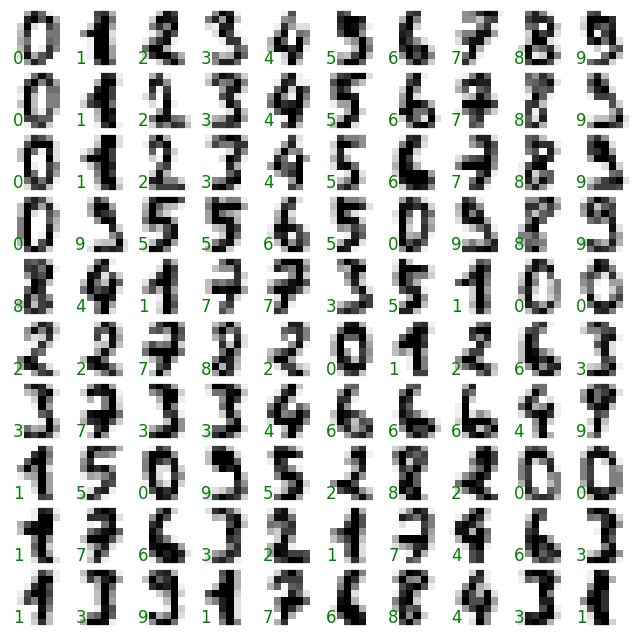

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [48]:
X = digits.data
X.shape

(1797, 64)

In [49]:
y = digits.target
y.shape

(1797,)

In [50]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/home/ujjawal/.local/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/ujjawal/.local/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

/tmp/ipykernel_4669/3654843724.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


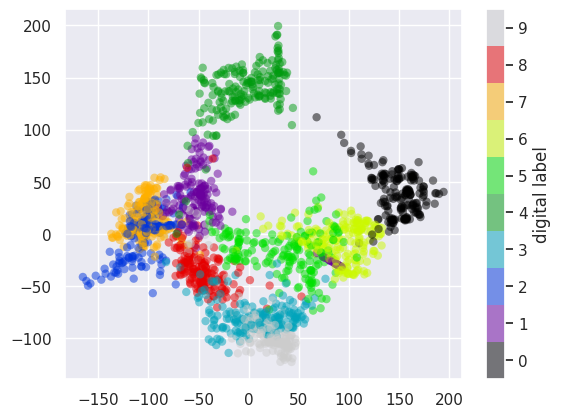

In [52]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target,
            edgecolors='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digital label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)


In [54]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.8333333333333334

Text(109.44999999999997, 0.5, 'True value')

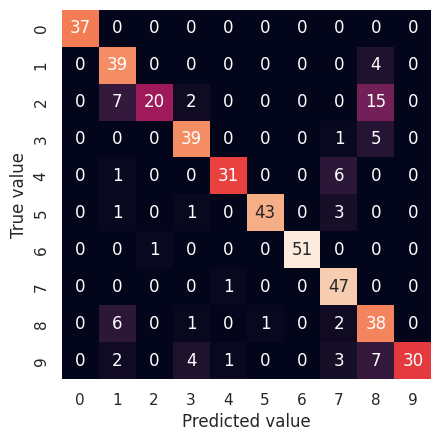

In [56]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted value')
plt.ylabel('True value')

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights. 